In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r"D:/Bengaluru_House_Data.csv")
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


<AxesSubplot:>

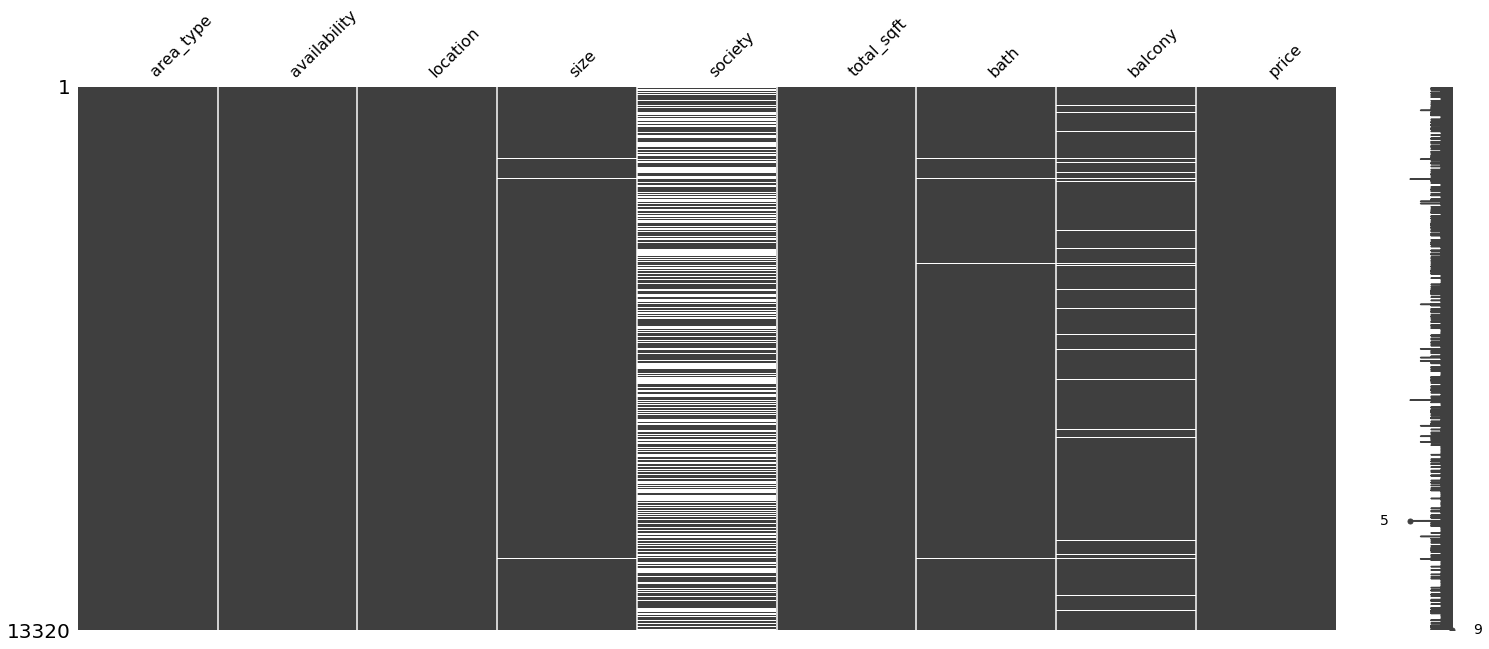

In [3]:
import missingno as msno
msno.matrix(data)

In [4]:
data['balcony']=round(data['balcony'].fillna(data['balcony'].mean()))
val=round((data['bath'].mean()))
data['bath']=data['bath'].fillna(val)

In [5]:
data['bath'].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9.,  8.,  7., 11., 10., 14., 27.,
       12., 16., 40., 15., 13., 18.])

In [6]:
data.groupby(['area_type']).agg('count')
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [7]:
df=data.drop(['area_type','availability'],axis='columns')

In [8]:
# df['bhk']=df['size'].apply(lambda x: int(x.split(' ')[0]))
df2=df.dropna(subset=['size'])
df2['size'].isnull().sum()
df2['bhk']=df2['size'].apply(lambda x: int(x.split(' ')[0]))

In [9]:
# msno.matrix(df2)
df2.head()

,location,size,society,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,2


In [10]:
df2.groupby(['total_sqft']).agg('count')

,location,size,society,bath,balcony,price,bhk
total_sqft,,,,,,,
1,1,1,0,1,1,1,1
1.25Acres,1,1,0,1,1,1,1
1.26Acres,1,1,0,1,1,1,1
1000,172,172,78,172,172,172,172
1000 - 1285,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...
995,10,10,4,10,10,10,10
996,4,4,3,4,4,4,4
997,2,2,0,2,2,2,2


In [11]:
def isf(x):
    try:
        float(x)
    except:
        return False
    return True

df2[~df2['total_sqft'].apply(lambda x:isf(x))]

,location,size,society,total_sqft,bath,balcony,price,bhk
30,Yelahanka,4 BHK,LedorSa,2100 - 2850,4.0,0.0,186.000,4
56,Devanahalli,4 Bedroom,BrereAt,3010 - 3410,3.0,2.0,192.000,4
81,Hennur Road,4 Bedroom,Gollela,2957 - 3450,3.0,2.0,224.500,4
122,Hebbal,4 BHK,SNontle,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,Vaarech,1042 - 1105,2.0,0.0,54.005,2
...,...,...,...,...,...,...,...,...
12990,Talaghattapura,3 BHK,Sodgere,1804 - 2273,3.0,0.0,122.000,3
13059,Harlur,2 BHK,Shodsir,1200 - 1470,2.0,0.0,72.760,2
13240,Devanahalli,1 BHK,Pardsri,1020 - 1130,3.0,2.0,52.570,1
13265,Hoodi,2 BHK,Ranuetz,1133 - 1384,2.0,0.0,59.135,2


In [12]:
def conv(x):
    tokens=x.split('-')
    if len(tokens)==2:
        x=float(tokens[0])
        y=float(tokens[1])
        return float(x+y)/2
    try:
        return float(x)
    except:
        return None

In [13]:
df2['total_sqft']=df['total_sqft'].apply(lambda x:conv(x))

In [14]:
# df2.location=df2.location.apply(lambda x: x.strip())
# x=df2.groupby('location')['location'].agg('count')
df2['location']=df2['location'].astype(str)
df2.location=df2.location.apply(lambda x: x.strip())
x=df2.groupby('location')['location'].agg('count').sort_values(ascending=False)
pd.set_option('display.max_rows', 30)
x

location
Whitefield           540
Sarjapur  Road       397
Electronic City      304
Kanakpura Road       273
Thanisandra          237
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1294, dtype: int64

In [15]:
location_st =(x[x<10])

In [16]:
df2['location']=df2['location'].apply(lambda x:'other' if x in location_st else x)

In [17]:
len(df2.location.unique())

255

In [18]:
df3=df2[~(df2.total_sqft/df2.bhk < 300)]

In [19]:
df3.head()

,location,size,society,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,NaN,1200.0,2.0,1.0,51.00,2


In [20]:
# x=df.price.apply(lambda x:x/float(df.total_sqft))
# df3.total_sqft.dtype
df3['psf']=df3['price']*100000/df3['total_sqft']
# a=pd.to_numeric(df3[])

In [21]:
df3.groupby('location')['location'].agg('count').sort_values(ascending=False)

location
other                   2453
Whitefield               539
Sarjapur  Road           393
Electronic City          295
Kanakpura Road           271
                        ... 
Vishwapriya Layout         7
Nagadevanahalli            7
5th Block Hbr Layout       7
BTM 1st Stage              5
Marsur                     5
Name: location, Length: 255, dtype: int64

In [22]:
def outl(df):
    new=pd.DataFrame()
    x=df.groupby('location')
    for key,values in x:
#         a=values['psf'].mean()
#         b=values['psf'].std()
        a=np.mean(values.psf)
        b=np.std(values.psf)
        delta=values[(values.psf>=(a-b)) & (values.psf<=(a+b))]
        new=pd.concat([new,delta])
    return new

In [23]:
df4=df3.dropna(subset=['total_sqft'])
# msno.matrix(df4)
df4.shape

(12514, 9)

In [24]:
df5=outl(df4)

In [25]:
def rem_out(df):
    exclude_data=np.array([])
    for location,loc_df in df.groupby('location'):
        bhk_sta={}
        for bhk, bhk_df in loc_df.groupby('bhk'):
            bhk_sta[bhk]={
                'mean' : np.mean(bhk_df.psf),
                'std' : np.mean(bhk_df.psf),
                'count' : bhk_df.shape[0]
            }
        for bhk,bhk_df in loc_df.groupby('bhk'):
            stats=bhk_sta.get(bhk-1)
            if(stats and stats['count']>5):
                exclude_data= np.append(exclude_data,bhk_df[bhk_df.psf<(stats['mean'])].index.values)
    return  df.drop(exclude_data,axis='index')


In [26]:
df6=rem_out(df5)

In [27]:
df6.shape

(7394, 9)

(array([ 553., 3639., 2306.,  454.,  254.,  114.,   43.,   18.,    8.,
           5.]),
 array([ 1300.        ,  3620.98039216,  5941.96078431,  8262.94117647,
        10583.92156863, 12904.90196078, 15225.88235294, 17546.8627451 ,
        19867.84313725, 22188.82352941, 24509.80392157]),
 <BarContainer object of 10 artists>)

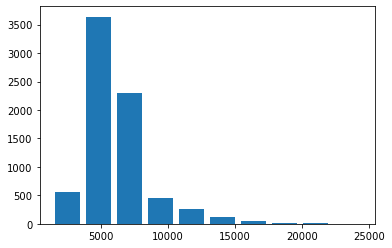

In [28]:
plt.hist(df6.psf,rwidth=0.8)

In [29]:
df7=df6.drop('society',axis='columns')

In [30]:
dummies=pd.get_dummies(df7.location)
dummies=dummies.drop('other',axis='columns')

In [31]:
df8=pd.concat([df7,dummies],axis='columns')

In [112]:
x=df8.drop(['price','location','size','psf'],axis='columns')
y=df8['price']
x

,total_sqft,bath,balcony,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
210,2850.0,4.0,1.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
848,1630.0,3.0,2.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2152,1875.0,2.0,3.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7138,1200.0,2.0,0.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7358,1235.0,2.0,2.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13238,1200.0,2.0,3.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13245,1800.0,1.0,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13285,1353.0,2.0,2.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13291,812.0,1.0,0.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [113]:
from sklearn.model_selection import cross_val_score

In [114]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [115]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [116]:
lr.score(x_test,y_test)

0.7884257021484941

In [117]:
from sklearn.model_selection import  ShuffleSplit
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [118]:
cv=ShuffleSplit(n_splits=10,test_size=0.2,random_state=0)
cross_val_score(DecisionTreeRegressor(),x,y,cv=cv)

array([0.38387964, 0.78078672, 0.61404778, 0.60399253, 0.76482679,
       0.39265887, 0.7084034 , 0.50240109, 0.43089107, 0.61621469])

In [119]:
def hypertuning(x,y):
    models={
        'linear_reg':{
            'model': LinearRegression(),
            'param':{
                'normalize': [True,False]
            }
        },
        'lasso':{
            'model':Lasso(),
            'param':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree':{
            'model': DecisionTreeRegressor(),
            'param':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        }
    }
    scores=[]
    cv=ShuffleSplit(n_splits=10,test_size=0.2,random_state=0)
    for algo_name,config in models.items():
        gs=GridSearchCV(config['model'],config['param'],cv=cv)
        gs.fit(x,y)
        print(gs.best_score_)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_param':gs.best_params_
        })
    return pd.DataFrame(data=scores,columns=['model','best_score','best_param'])
#     return scores
hypertuning(x,y)

0.8348786942872837
0.6898479969765792
0.7215480856785599


,model,best_score,best_param
0,linear_reg,0.834879,{'normalize': False}
1,lasso,0.689848,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.721548,"{'criterion': 'mse', 'splitter': 'random'}"


In [120]:
def predict_price(location,size,bhk,balc,bath):
    index=np.where(x.columns==location)[0][0]
    arr=np.zeros(len(x.columns))
    arr[0]=size
    arr[1]=bath
    arr[2]=balc
    arr[3]=bhk
#     print(index)
    if(index>=0):
        arr[index]=1
    return lr.predict([arr])[0]

In [121]:
# df2[location='2nd Stage Nagarbhavi')
# np.where(x.columns=='other')
x

,total_sqft,bath,balcony,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
210,2850.0,4.0,1.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
848,1630.0,3.0,2.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2152,1875.0,2.0,3.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7138,1200.0,2.0,0.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7358,1235.0,2.0,2.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13238,1200.0,2.0,3.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13245,1800.0,1.0,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13285,1353.0,2.0,2.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13291,812.0,1.0,0.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [123]:
x.columns

Index(['total_sqft', 'bath', 'balcony', 'bhk', '1st Block Jayanagar',
       '1st Block Koramangala', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=258)

In [126]:
predict_price('Indira Nagar',1000,2,4,3)

196.3411498323877

In [127]:
import pickle
with open("bangluru_home_price.pickle",'wb') as f:
    pickle.dump(lr,f)

In [132]:
import json
columns={
    'data_columns': [col.lower() for col in x.columns]
}

with open('colums.json','w') as f:
    f.write(json.dumps(columns))